<a href="https://colab.research.google.com/github/Charliefirewall/Machine-Learning-Projects/blob/main/Global_terrorism_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement!!**

To uncover key insights and trends related to global terrorist activities, there is a need to explore and analyze the Global Terrorism Database (GTD), an open-source, comprehensive repository of information on terrorist attacks worldwide from 1970 to 2017. By utilizing the database, it is essential to identify and understand significant patterns, factors, and occurrences associated with terrorism.


## **GTD's data collection different institutions:**

* inkerton Global Intelligence Service (PGIS),
* Center for Terrorism and Intelligence Studies (CETIS),
* Institute for the Study of Violent Groups (ISVG),
* Study of terrorism and responses to terrorism (START) staff at the
  University of Maryland

Exclusion of Data of 1993 : Due to data loss prior to compilation by START : only 15 % reliability of data

Changes made to GTD: Year 2014: target subtype and international/domestic variables removal of redundant variables and adjustments to weapon subtype categories. Year 2015: Reclasification of regions and countries, use of formal names Year 2016: Target subtype, weapon subtype, Geocoding for entire dataset Year 2017: New Weapon: Chemical Weapon, Casuality information Year 2018: target subtype variable, weapon type variable

GTD defines terrorism as the intentional use of illegal force and violence by non-state actors to achieve political, economic, religious, or social goals through fear or intimidation, requiring intentional violence and non-state actors.

Incidents must meet at least two of three additional criteria: having political, economic, religious, or social goals; intending to coerce or intimidate a larger audience; and occurring outside legitimate warfare activities.

Incidents with uncertain categorization can be filtered using the "Doubt Terrorism Proper?" field, while unsuccessful attacks are included if attempted. Single incidents are determined by geographic and temporal continuity, with discontinuity resulting in separate incidents.

## **Data set**
GTD ID system assigns a 12-digit numeric code to each incident, with the first 8 digits representing the date in "yyyymmdd" format and the last 4 digits indicating a sequential case number for the day. 0 indicates: unknown values ; Approximate dates are unclear

In [5]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [6]:
df = pd.read_csv('Global Terrorism Data.csv', encoding='latin-1')

<ipython-input-6-26c3de245540>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Global Terrorism Data.csv', encoding='latin-1')


In [7]:


df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                   'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                   'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive',
                   'city':'City','longitude':'Longitude','latitude':'Latitude'},inplace=True)


df= df[['Year','Month','Day','Country','Region','City','Latitude','Longitude','AttackType',
        'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]


df['Casualities']=df['Killed']+df['Wounded']
df_tmp = df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128588 entries, 0 to 128587
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         128588 non-null  int64  
 1   Month        128588 non-null  int64  
 2   Day          128588 non-null  int64  
 3   Country      128588 non-null  object 
 4   Region       128588 non-null  object 
 5   City         128153 non-null  object 
 6   Latitude     124331 non-null  float64
 7   Longitude    124330 non-null  float64
 8   AttackType   128588 non-null  object 
 9   Killed       121339 non-null  float64
 10  Wounded      117469 non-null  float64
 11  Target       127950 non-null  object 
 12  Summary      62459 non-null   object 
 13  Group        128588 non-null  object 
 14  Target_type  128588 non-null  object 
 15  Weapon_type  128587 non-null  object 
 16  Motive       43023 non-null   object 
 17  Casualities  117125 non-null  float64
dtypes: float64(5), int64(3),

<ipython-input-7-ed59f8eab77c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Casualities']=df['Killed']+df['Wounded']


In [8]:
df.head()

,Year,Month,Day,Country,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [9]:

# Remove all duplicate rows
df = df.drop_duplicates(keep=False)
df.replace('a', None)
len(df)
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             435
Latitude        3599
Longitude       3600
AttackType         0
Killed          6185
Wounded         9958
Target           523
Summary        56798
Group              0
Target_type        0
Weapon_type        1
Motive         75826
Casualities    10288
dtype: int64

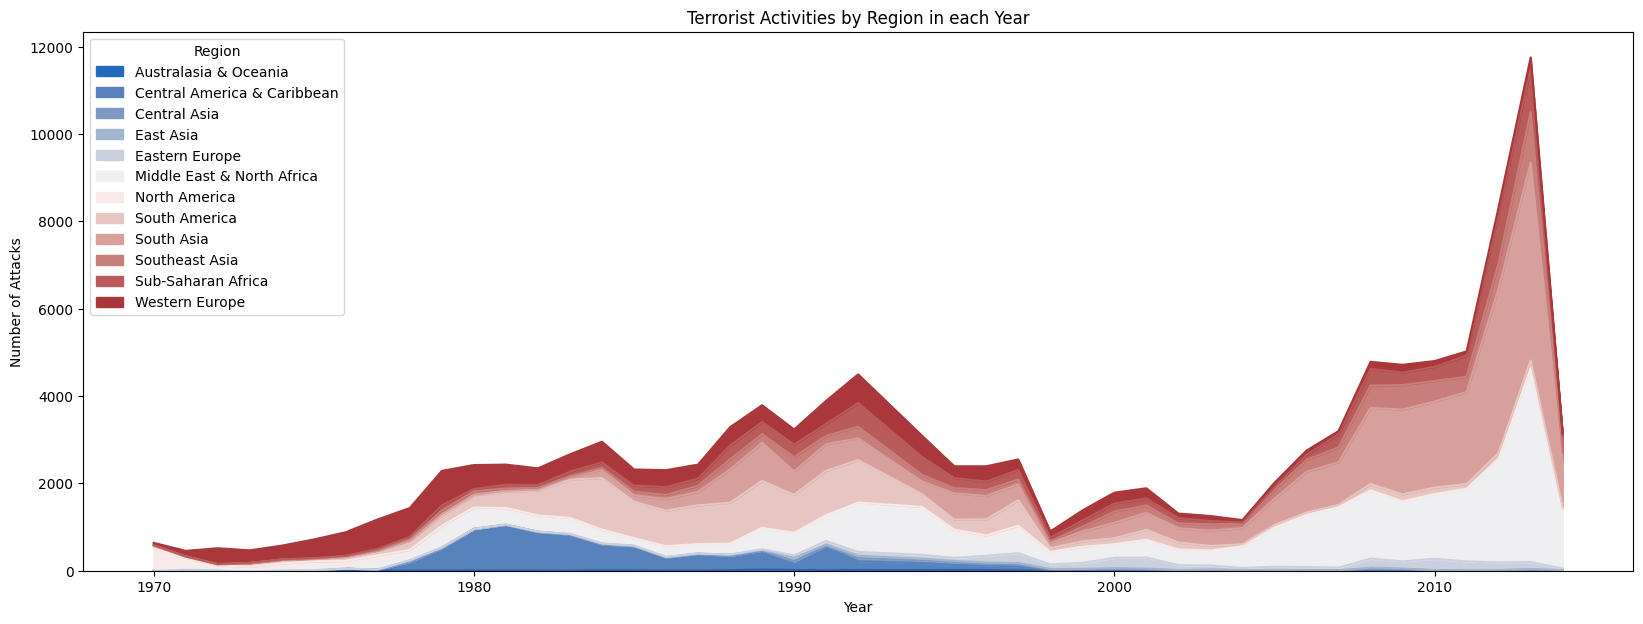

In [10]:

pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(20,7),colormap="vlag")
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

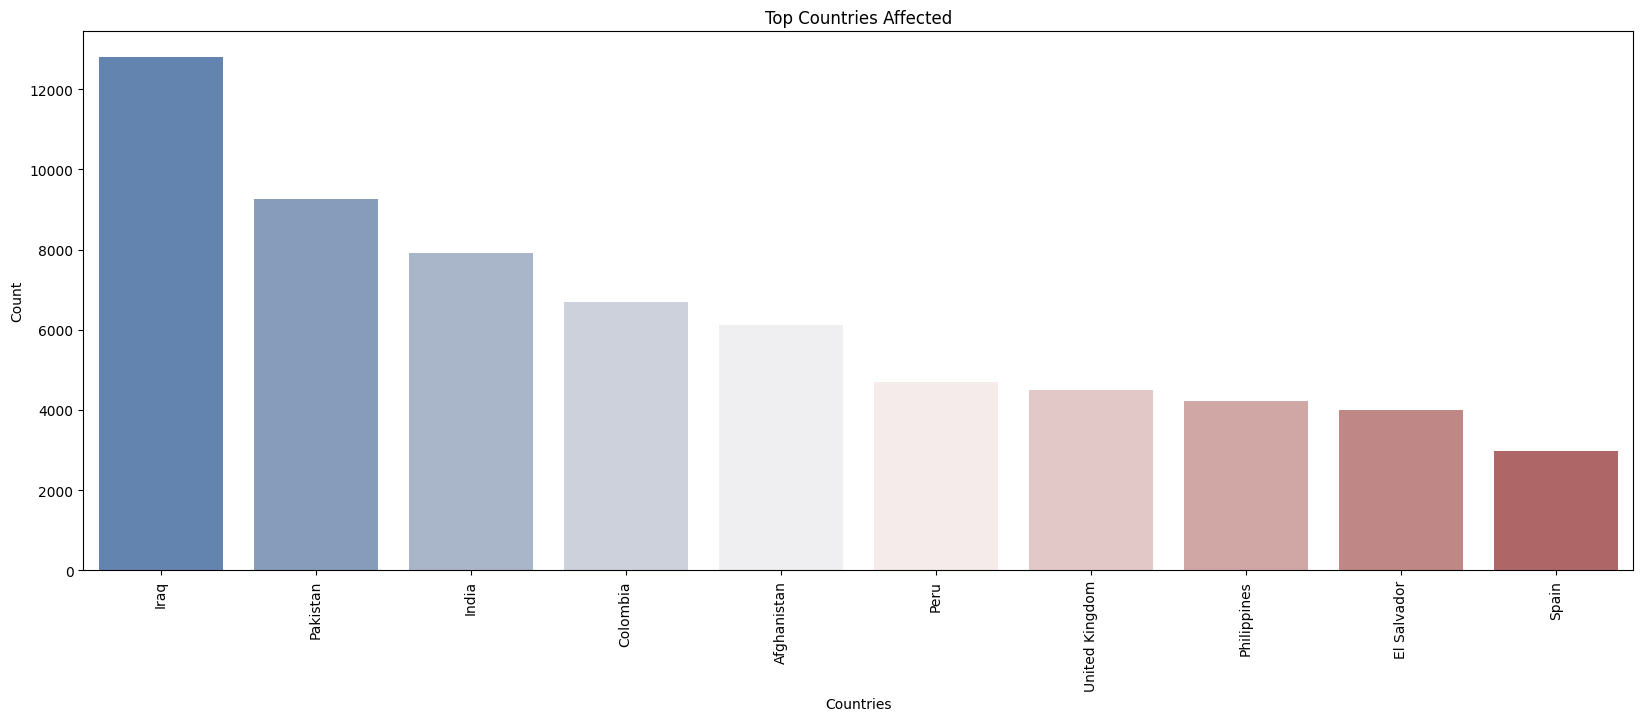

In [14]:
# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(20, 7))

# Get the top 10 most frequent countries from the 'Country' column
top_countries = df['Country'].value_counts()[:10].to_frame().reset_index()

# Rename the columns of the top_countries DataFrame
top_countries.columns = ['Country', 'Count']

# Create a bar plot with countries on the x-axis and count on the y-axis
sns.barplot(x='Country', y='Count', data=top_countries,hue ='Country',palette='vlag',legend=False)

# Set the title of the plot
ax.set_title('Top Countries Affected')

# Set the x-axis label
ax.set_xlabel('Countries')

# Set the y-axis label
ax.set_ylabel('Count')

# Rotate the x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

# Display the plot
plt.show()


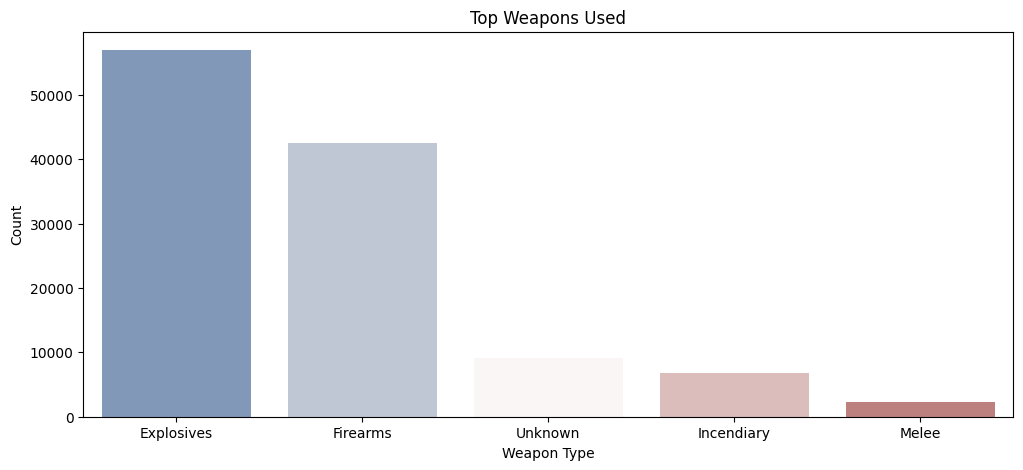

In [15]:


# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(12, 5))

# Get the top 5 most frequent weapon types from the 'Weapon_type' column
top_Weapons = df['Weapon_type'].value_counts()[:5].to_frame().reset_index()

# Rename the columns of the top_Weapons DataFrame
top_Weapons.columns = ['Weapon_type', 'Count']

# Create a bar plot with weapon types on the x-axis and count on the y-axis
sns.barplot(x='Weapon_type', y='Count', data=top_Weapons, hue='Weapon_type', palette='vlag', ax=ax, legend=False)

# Set the title of the plot
ax.set_title('Top Weapons Used')

# Set the x-axis label
ax.set_xlabel('Weapon Type')

# Set the y-axis label
ax.set_ylabel('Count')

# Adjust the x-axis tick labels (optional)
plt.xticks(rotation=0)

# Display the plot
plt.show()

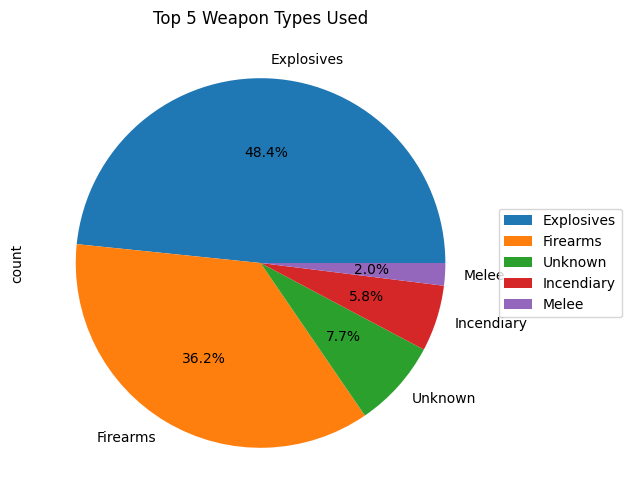

In [16]:
# Get the top 5 most frequent weapon types and their counts
top5_Weapon = df['Weapon_type'].value_counts()[:5]

# Create a pie chart
fig, ax = plt.subplots(figsize=(6, 6))
top5_Weapon.plot(kind='pie', autopct="%1.1f%%", ax=ax)

# Add a title to the pie chart
ax.set_title('Top 5 Weapon Types Used')

# Add a legend to the pie chart
ax.legend(top5_Weapon.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Display the pie chart
plt.show()

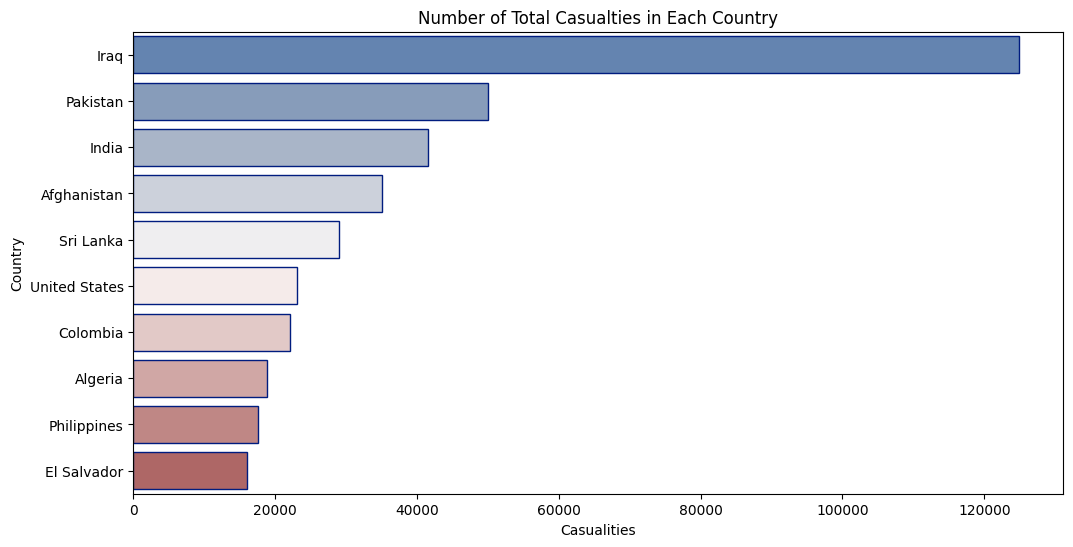

In [18]:
# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Group the data by 'Country' and sum the 'Casualities' column
count_cas = df.groupby('Country')['Casualities'].sum().reset_index().sort_values('Casualities', ascending=False)[:10]

# Create a horizontal bar plot
sns.barplot(x='Casualities', y='Country', data=count_cas, palette='vlag', hue = 'Country', edgecolor=sns.color_palette('dark', 10), orient='h', legend=False)

# Set the title of the plot
plt.title('Number of Total Casualties in Each Country')

# Display the plot
plt.show()

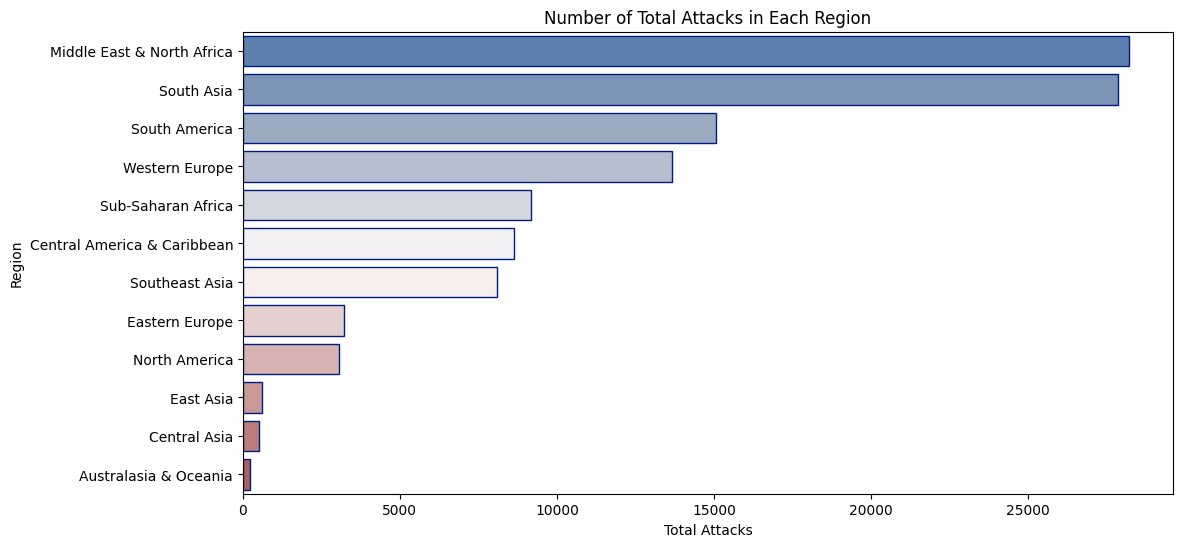

In [19]:
# Get the count of attacks for each region
region_attacks = df['Region'].value_counts().to_frame().reset_index()

# Rename the columns of the DataFrame
region_attacks.columns = ['Region', 'Total Attacks']

# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Create a horizontal bar plot
sns.barplot(x='Total Attacks', y='Region', data = region_attacks, palette='vlag',hue ='Region', edgecolor=sns.color_palette('dark', 10), orient='h')

# Set the title of the plot
plt.title('Number of Total Attacks in Each Region')

# Display the plot
plt.show()

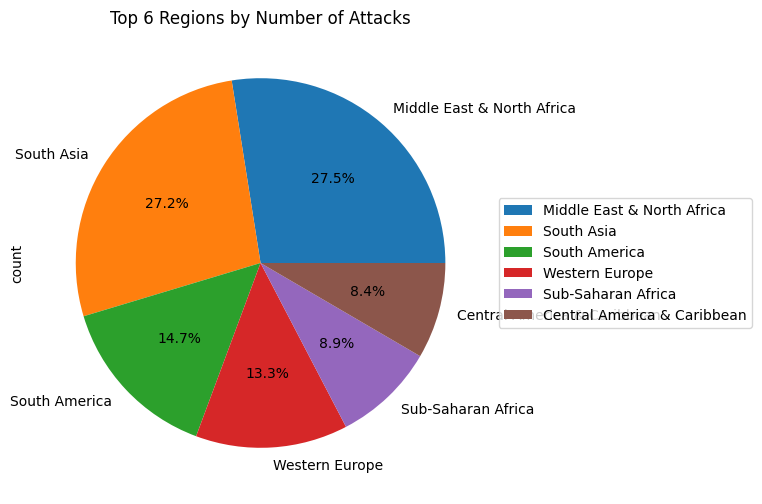

In [20]:
# Get the top 6 most frequent regions and their counts
top5_Region = df['Region'].value_counts()[:6]

# Create a pie chart
fig, ax = plt.subplots(figsize=(6, 6))
top5_Region.plot(kind='pie', autopct="%1.1f%%", ax=ax)

# Add a title to the pie chart
ax.set_title('Top 6 Regions by Number of Attacks')

# Add a legend to the pie chart
ax.legend(top5_Region.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Display the pie chart
plt.show()

In [21]:
Mid_Nor=df[df.Region == "Middle East & North Africa"]
Mid_Nor.head()

,Year,Month,Day,Country,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
95,1970,2,28,Jordan,Middle East & North Africa,Hebron,31.530243,35.094162,Armed Assault,NaN,NaN,Tourist Bus,NaN,Unknown,Tourists,Firearms,NaN,NaN
133,1970,3,14,Egypt,Middle East & North Africa,Alexandria,31.198056,29.919167,Bombing/Explosion,0.0,2.0,United Arab Airlines Flight Antonov 24 Acft,NaN,Unknown,Airports & Aircraft,Explosives,NaN,2.0
158,1970,3,29,Lebanon,Middle East & North Africa,Beirut,33.888523,35.503513,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Popular Front for the Liberation of Palestine ...,Government (Diplomatic),Explosives,NaN,0.0
195,1970,4,15,Jordan,Middle East & North Africa,Amman,31.950001,35.933331,Bombing/Explosion,0.0,0.0,US Embassy,NaN,Popular Front for the Liberation of Palestine ...,Government (Diplomatic),Explosives,NaN,0.0
226,1970,4,25,Turkey,Middle East & North Africa,Istanbul,41.106178,28.689863,Bombing/Explosion,0.0,0.0,EL AL Office,NaN,Palestinians,Airports & Aircraft,Explosives,NaN,0.0


In [22]:
Mid_Nor.count()


Year           28205
Month          28205
Day            28205
Country        28205
Region         28205
City           28175
Latitude       27488
Longitude      27488
AttackType     28205
Killed         27244
Wounded        26654
Target         28072
Summary        19885
Group          28205
Target_type    28205
Weapon_type    28204
Motive         13295
Casualities    26570
dtype: int64

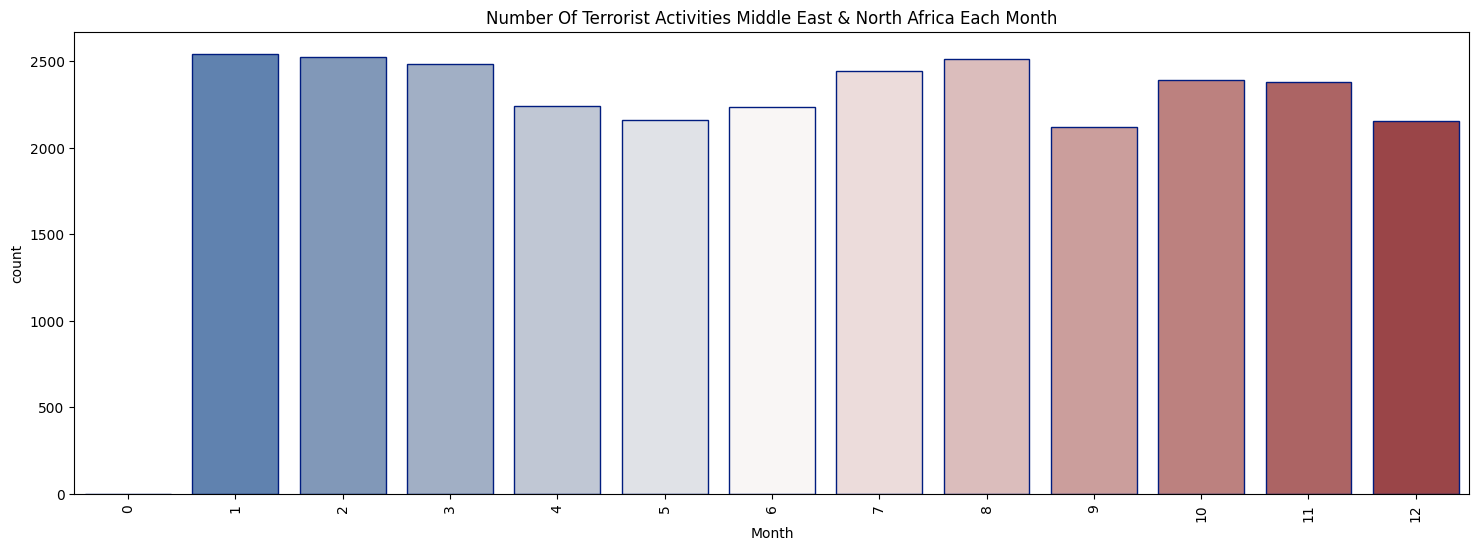

In [23]:
import matplotlib.patches as mpatches

# Create a figure with a specific size
plt.figure(figsize=(18, 6))

# Create a count plot for the 'Month' column
sns.countplot(x='Month', data=Mid_Nor, palette='vlag',hue = 'Month', edgecolor=sns.color_palette('dark', 7), legend=False)

# Rotate the x-axis tick labels
plt.xticks(rotation=90)

# Set the title of the plot
plt.title('Number Of Terrorist Activities Middle East & North Africa Each Month')

# Display the plot
plt.show()

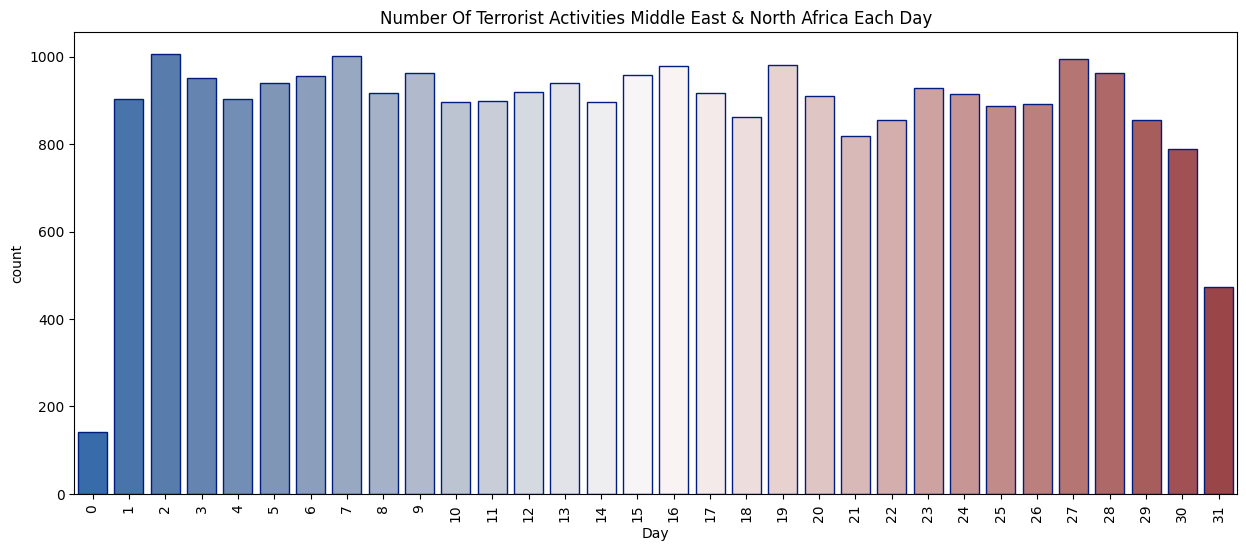

In [24]:
# Create a figure with a specific size
plt.figure(figsize=(15, 6))

# Create a count plot for the 'Day' column
sns.countplot(x='Day', data=Mid_Nor, palette='vlag', hue='Day', edgecolor = sns.color_palette('dark', 3), legend = False)

# Rotate the x-axis tick labels
plt.xticks(rotation=90)

# Set the title of the plot
plt.title('Number Of Terrorist Activities Middle East & North Africa Each Day')

# Display the plot
plt.show()

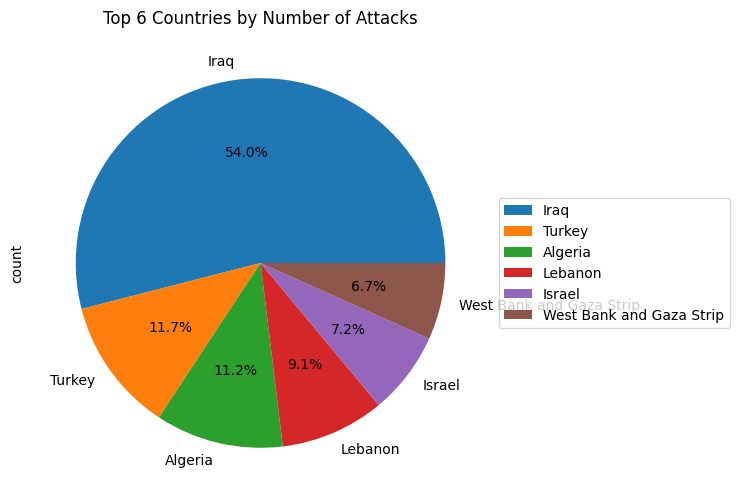

In [25]:
# Get the top 6 most frequent countries and their counts
top5_country = Mid_Nor['Country'].value_counts()[:6]

# Drop any rows with NaN (null) values
top5_country = top5_country.dropna()

# Create a pie chart
fig, ax = plt.subplots(figsize=(6, 6))
top5_country.plot(kind='pie', autopct="%1.1f%%")

# Add a title to the pie chart
ax.set_title('Top 6 Countries by Number of Attacks')

# Add a legend to the pie chart
ax.legend(top5_country.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Display the pie chart
plt.show()

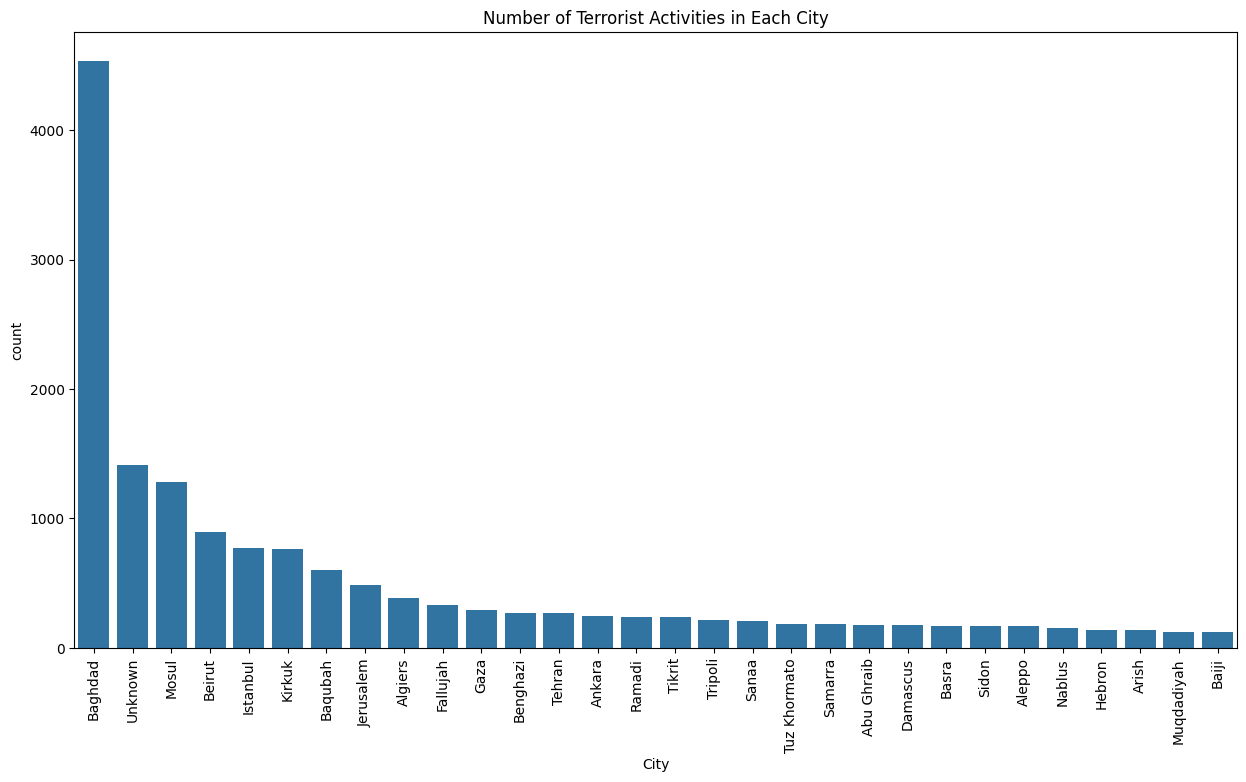

In [26]:
# Get the top 30 cities from the 'Mid_Nor' DataFrame
top_30_city = Mid_Nor['City'].value_counts().head(30).reset_index()

# Rename the columns
top_30_city.columns = ['City', 'count']

# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(15, 8))

# Create a bar plot with cities on the x-axis and count on the y-axis
sns.barplot(x='City', y='count', data=top_30_city)

# Rotate the x-axis tick labels
plt.xticks(rotation=90)

# Set the title of the plot
ax.set_title('Number of Terrorist Activities in Each City')

# Display the plot
plt.show()

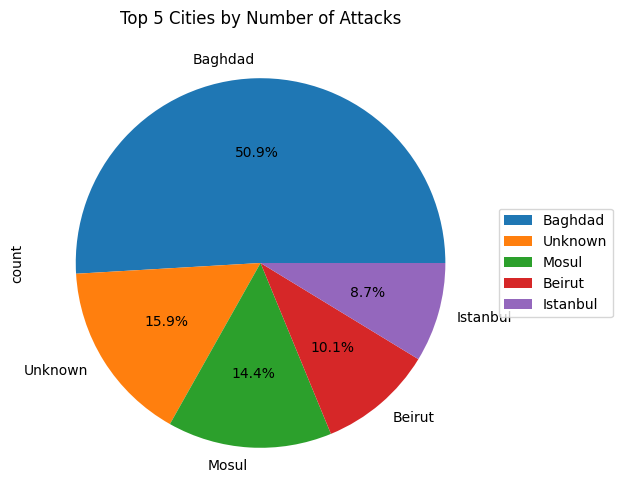

In [27]:
# Get the top 5 most frequent cities and their counts
top5_city = Mid_Nor['City'].value_counts()[:5]

# Drop any rows with NaN (null) values
top5_city = top5_city.dropna()

# Create a pie chart
fig, ax = plt.subplots(figsize=(6, 6))
top5_city.plot(kind='pie', autopct="%1.1f%%", ax=ax)

# Add a title to the pie chart
ax.set_title('Top 5 Cities by Number of Attacks')

# Add a legend to the pie chart
ax.legend(top5_city.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Display the pie chart
plt.show()

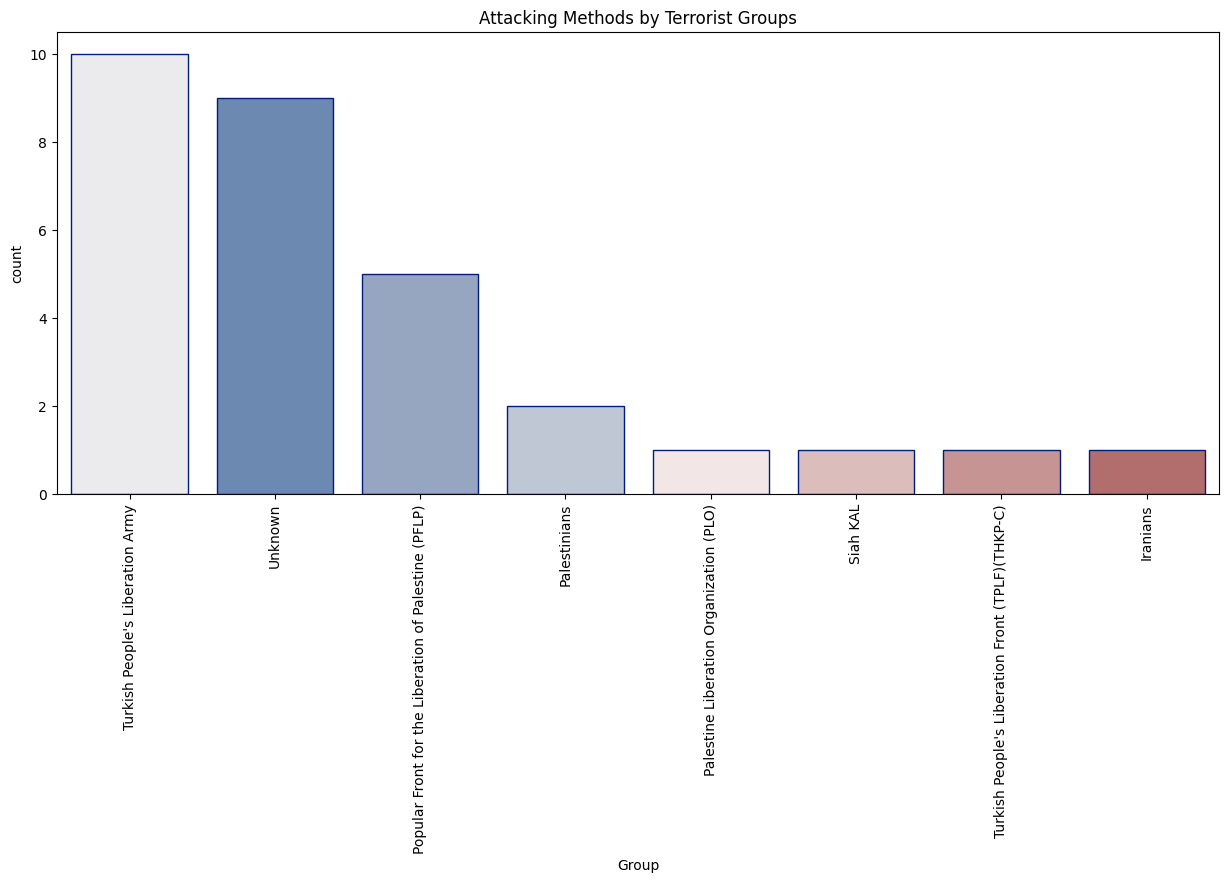

In [28]:
# Get the top 30 rows from the 'Mid_Nor' DataFrame
top_30_Group = Mid_Nor.head(30)

# Create a figure with a specific size
plt.figure(figsize=(15, 6))

# Create a count plot for the 'Group' column
sns.countplot(x='Group', data=top_30_Group, palette='vlag',hue='Group', order=top_30_Group['Group'].value_counts().index, edgecolor=sns.color_palette('dark', 7))

# Rotate the x-axis tick labels
plt.xticks(rotation=90)

# Set the title of the plot
plt.title('Attacking Methods by Terrorist Groups')

# Display the plot
plt.show()

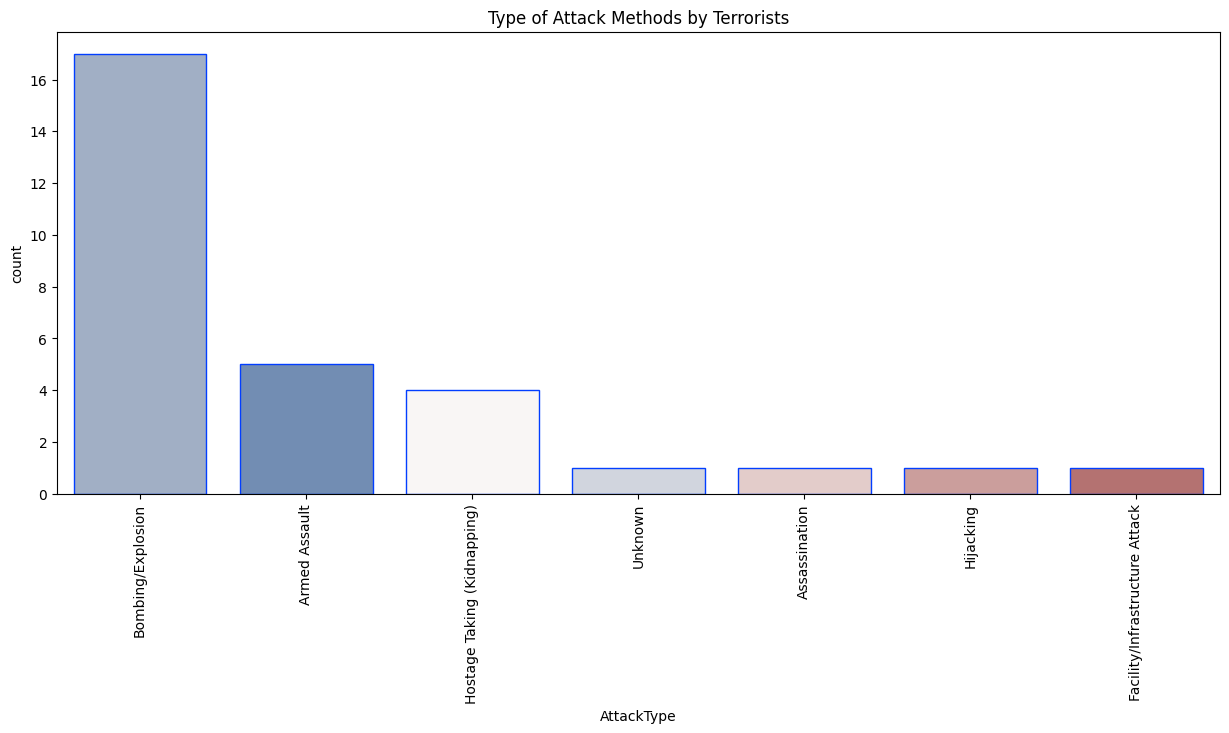

In [29]:
# Get the top 30 rows from the 'Mid_Nor' DataFrame
top_30_Att = Mid_Nor.head(30)

# Create a figure with a specific size
plt.figure(figsize=(15, 6))

# Create a count plot for the 'AttackType' column
sns.countplot(x='AttackType', data=top_30_Att, palette='vlag',hue='AttackType', order=top_30_Att['AttackType'].value_counts().index, edgecolor=sns.color_palette('bright', 7))

# Rotate the x-axis tick labels
plt.xticks(rotation=90)

# Set the title of the plot
plt.title('Type of Attack Methods by Terrorists')

# Display the plot
plt.show()

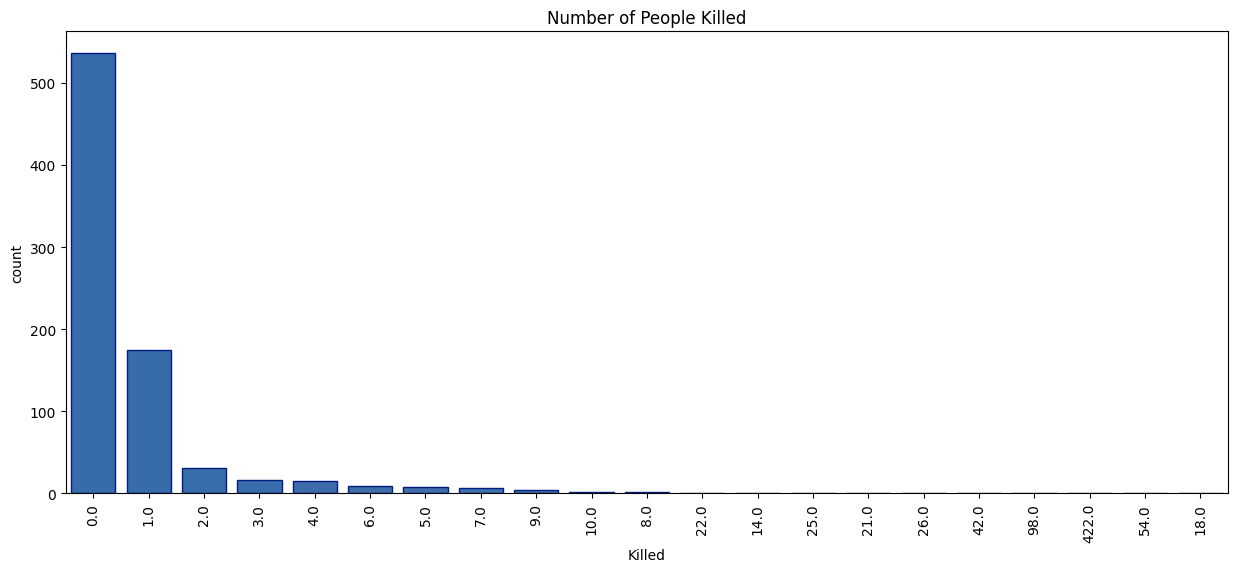

In [32]:
# Get the top 1000 rows from the 'Mid_Nor' DataFrame
top_30_kill = Mid_Nor.head(1000)

# Create a figure with a specific size
plt.figure(figsize=(15, 6))

# Create a count plot for the 'Killed' column
sns.countplot(x='Killed', data=top_30_kill, palette='vlag', hue= 'Killed',order=top_30_kill['Killed'].value_counts().index, edgecolor=sns.color_palette('dark', 7), legend = False)

# Rotate the x-axis tick labels
plt.xticks(rotation=90)

# Set the title of the plot
plt.title('Number of People Killed')

# Display the plot
plt.show()

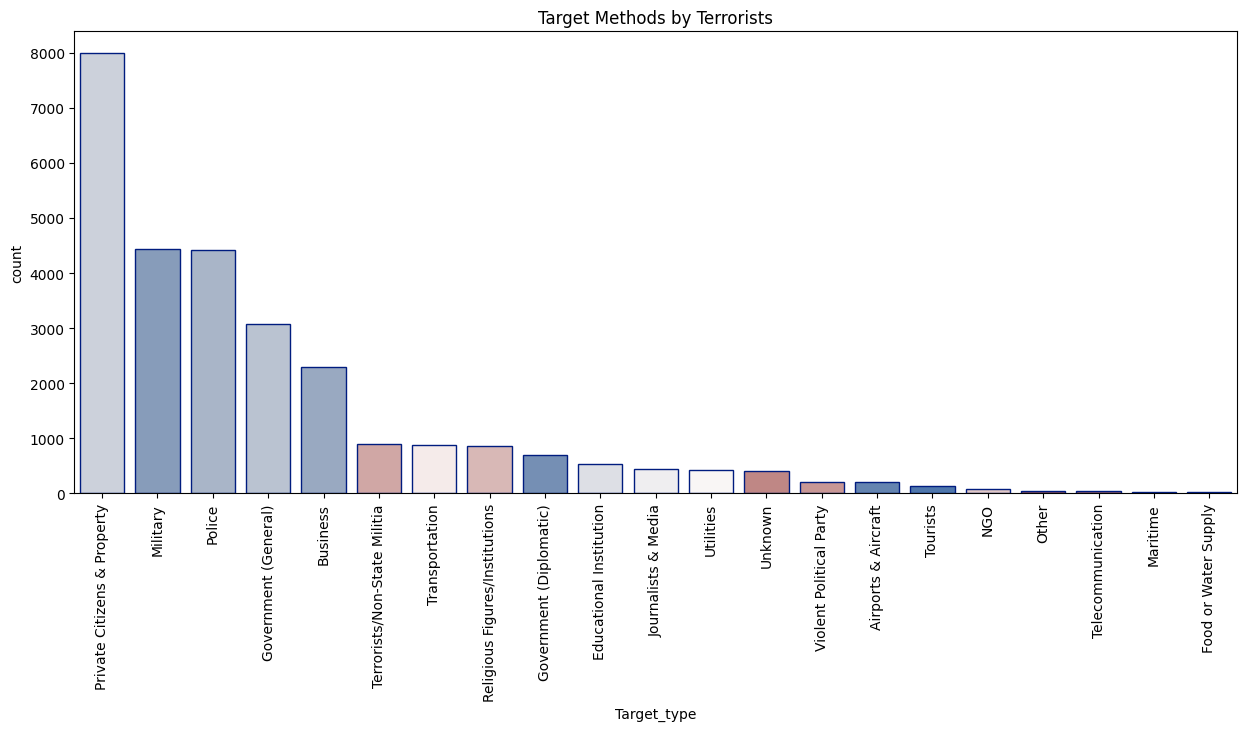

In [36]:
# Create a figure with a specific size
plt.figure(figsize=(15, 6))

# Create a count plot for the 'Target_type' column
sns.countplot(x='Target_type', data=Mid_Nor, palette='vlag',hue='Target_type', legend = False, order=Mid_Nor['Target_type'].value_counts().index, edgecolor=sns.color_palette('dark', 7))

# Rotate the x-axis tick labels
plt.xticks(rotation=90)

# Set the title of the plot
plt.title('Target Methods by Terrorists')

# Display the plot
plt.show()

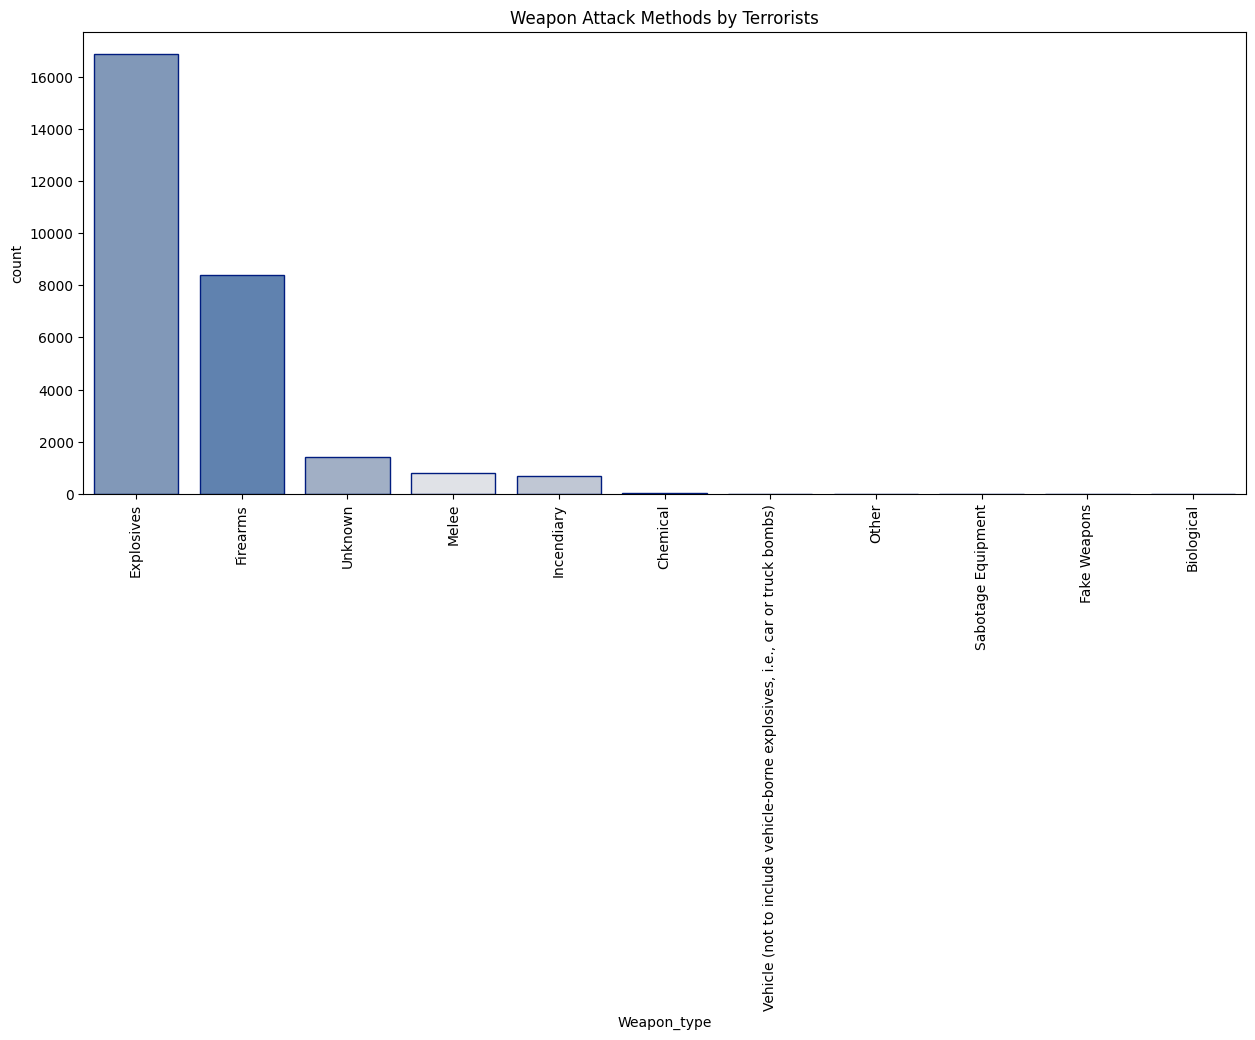

In [74]:
# Create a figure with a specific size
plt.figure(figsize=(15, 6))

# Create a count plot for the 'Weapon_type' column
sns.countplot(x='Weapon_type', data=Mid_Nor, palette='vlag',hue = 'Weapon_type', legend = False, order=Mid_Nor['Weapon_type'].value_counts().index, edgecolor=sns.color_palette('dark', 7))

# Rotate the x-axis tick labels
plt.xticks(rotation=90)

# Set the title of the plot
plt.title('Weapon Attack Methods by Terrorists')

# Display the plot
plt.show()

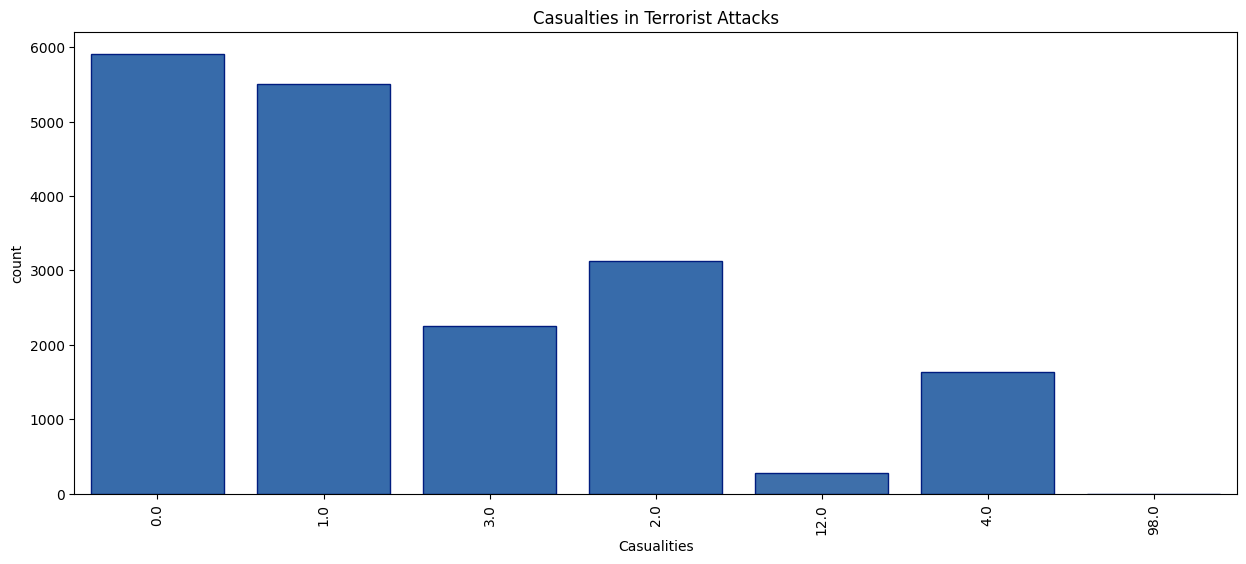

In [39]:
# Get the top 100 rows from the 'Mid_Nor' DataFrame
top_100_casu = Mid_Nor.head(100)

# Create a figure with a specific size
plt.figure(figsize=(15, 6))

# Create a count plot for the 'casualities' column
sns.countplot(x='Casualities', data=Mid_Nor, palette='vlag', hue= 'Casualities', legend = False, order=top_100_casu['Casualities'].value_counts().index, edgecolor=sns.color_palette('dark', 7))

# Rotate the x-axis tick labels
plt.xticks(rotation=90)

# Set the title of the plot
plt.title('Casualties in Terrorist Attacks')

# Display the plot
plt.show()

In [42]:
# Select the 'Country', 'Killed', 'Wounded', and 'casualities' columns from the 'Mid_Nor' DataFrame
number_of_affected = Mid_Nor[['Country', 'Killed', 'Wounded', 'Casualities']]

# Group the data by 'Country' and sum the 'Killed', 'Wounded', and 'casualities' columns
# Reset the index and sort the data in descending order based on the 'casualities' column
number_of_affected = number_of_affected.groupby(by=['Country']).sum().reset_index().sort_values(by=['Casualities'], ascending=False)

# Display the top 10 rows of the 'number_of_affected' DataFrame
number_of_affected.head(10)

,Country,Killed,Wounded,Casualities
5,Iraq,38586.0,88485.0,124888.0
0,Algeria,10809.0,8927.0,18826.0
9,Lebanon,3797.0,10216.0,13819.0
18,Turkey,5121.0,5591.0,10654.0
6,Israel,1617.0,7464.0,8858.0
16,Syria,3497.0,5146.0,7582.0
22,Yemen,2941.0,3050.0,5484.0
4,Iran,1572.0,3938.0,5431.0
20,West Bank and Gaza Strip,1171.0,2490.0,3488.0
2,Egypt,1221.0,2102.0,3312.0


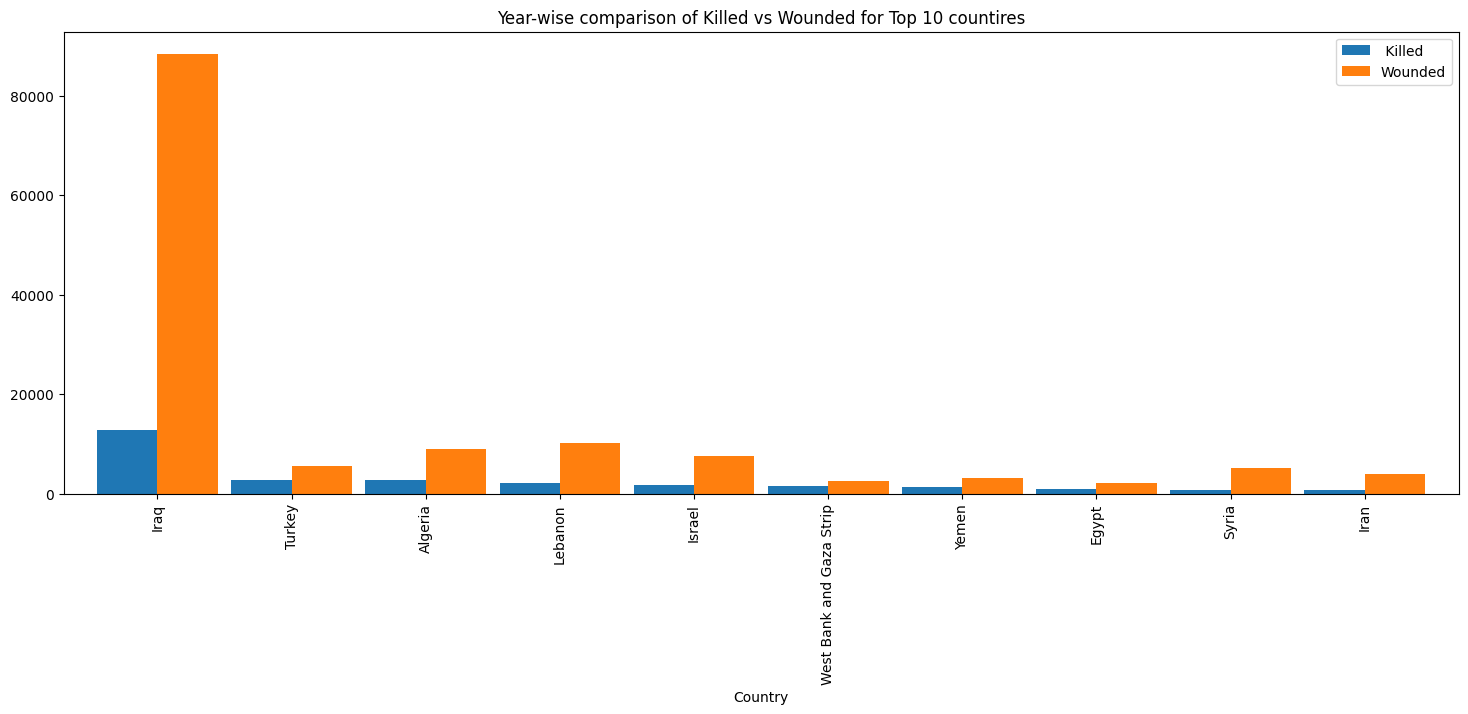

In [41]:
# Get the top 10 most frequent countries and their counts
count_terror = Mid_Nor['Country'].value_counts()[:10].to_frame()

# Rename the column to ' Killed '
count_terror.columns = [' Killed ']

# Group the data by 'Country' and sum the 'Wounded' column
# Store the result in a new DataFrame
count_kill = Mid_Nor.groupby('Country')['Wounded'].sum().to_frame()

# Merge the two DataFrames on the index (Country)
# Keep all rows from count_terror and fill missing values with 0 in count_kill
merged_data = count_terror.merge(count_kill, left_index=True, right_index=True, how='left').fillna(0)

# Create a bar plot
merged_data.plot.bar(width=0.9, figsize=(18, 6))

# Set the title of the plot
plt.title('Year-wise comparison of Killed vs Wounded for Top 10 countires')

# Get the current figure
fig = plt.gcf()

# Display the plot
plt.show()

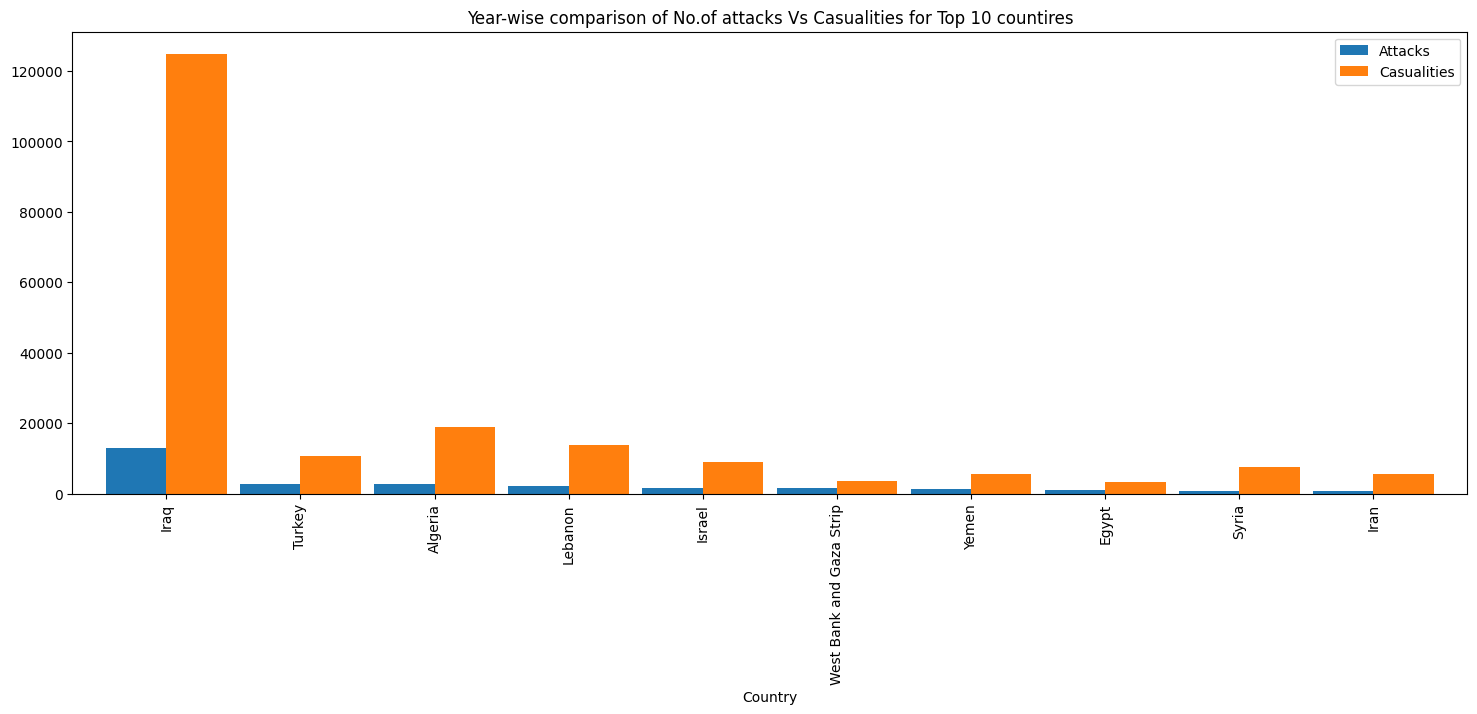

In [43]:
# Get the top 10 most frequent countries and their counts
count_terror = Mid_Nor['Country'].value_counts()[:10].to_frame()

# Rename the column to 'Attacks'
count_terror.columns = ['Attacks']

# Group the data by 'Country' and sum the 'casualities' column
# Store the result in a new DataFrame
count_kill = Mid_Nor.groupby('Country')['Casualities'].sum().to_frame()

# Merge the two DataFrames on the index (Country)
# Keep all rows from count_terror and fill missing values with 0 in count_kill
merged_data = count_terror.merge(count_kill, left_index=True, right_index=True, how='left').fillna(0)

# Create a bar plot
merged_data.plot.bar(width=0.9)

# Set the title of the plot
plt.title('Year-wise comparison of No.of attacks Vs Casualities for Top 10 countires')

# Get the current figure
fig = plt.gcf()

# Set the size of the figure
fig.set_size_inches(18, 6)

# Display the plot
plt.show()

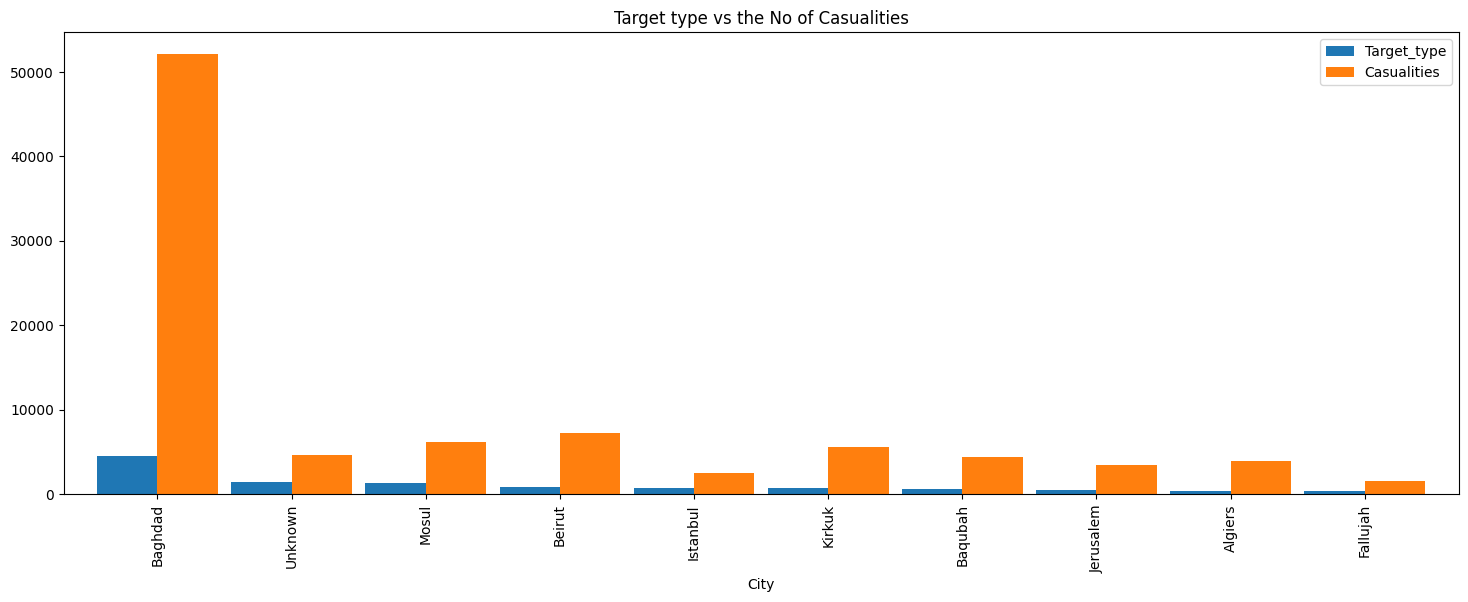

In [46]:
# Get the top 10 most frequent cities and their counts
count_terror = Mid_Nor['City'].value_counts()[:10].to_frame()

# Rename the column to 'Target_type'
count_terror.columns = ['Target_type']

# Group the data by 'city' and sum the 'casualities' column
# Store the result in a new DataFrame
count_kill = Mid_Nor.groupby('City')['Casualities'].sum().to_frame()

# Merge the two DataFrames on the index (city)
# Keep all rows from count_terror and fill missing values with 0 in count_kill
merged_data = count_terror.merge(count_kill, left_index=True, right_index=True, how='left').fillna(0)

# Create a bar plot
merged_data.plot.bar(width=0.9)

# Get the current figure
fig = plt.gcf()

# Set the size of the figure
fig.set_size_inches(18, 6)

# Set the title of the plot
plt.title('Target type vs the No of Casualities')

# Display the plot
plt.show()

In [54]:
# Select the 'Group' and 'Killed' columns from the 'Mid_Nor' DataFrame
group_data = Mid_Nor[['Group', 'Killed']]

# Group the data by 'Group' and sum the 'Killed' column
# Sort the data in descending order based on the 'Killed' column
# Select the top 15 rows

group_killed = group_data.groupby('Group')['Killed'].sum().sort_values(ascending=False).head(15)

# Display information about the 'group_killed' DataFrame
group_killed.info()

<class 'pandas.core.series.Series'>
Index: 15 entries, Unknown to Algerian Islamic Extremists
Series name: Killed
Non-Null Count  Dtype  
--------------  -----  
15 non-null     float64
dtypes: float64(1)
memory usage: 240.0+ bytes


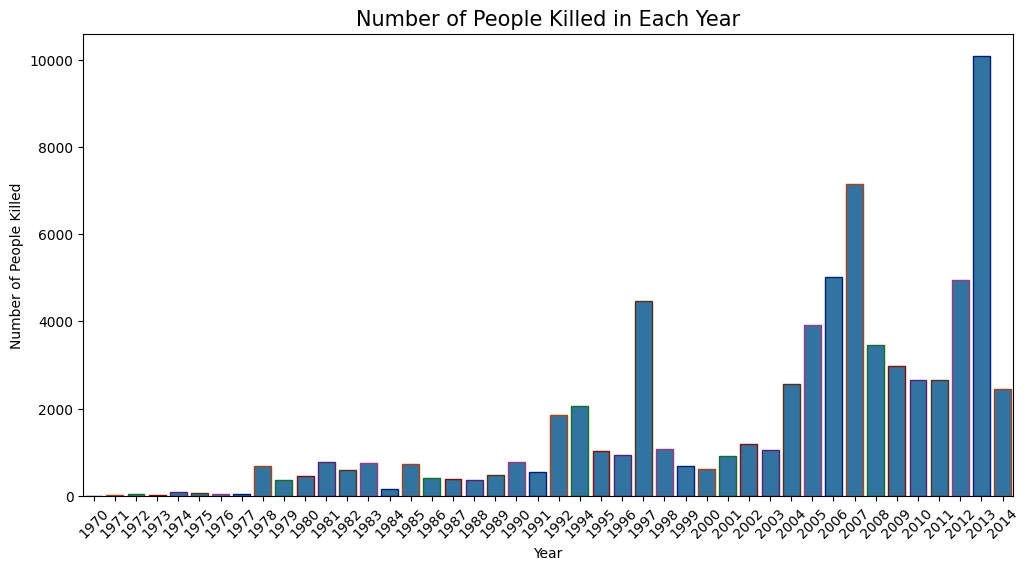

In [55]:
# Select the 'Year' and 'Killed' columns from the 'Mid_Nor' DataFrame
# Group the data by 'Year' and sum the 'Killed' column
died_people = Mid_Nor[['Year', 'Killed']].groupby(['Year']).sum()

# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Create a bar plot with years on the x-axis and number of people killed on the y-axis
sns.barplot(x=died_people.index, y=died_people['Killed'].values, edgecolor=sns.color_palette('dark', 7))

# Set the title of the plot with a specific font size
plt.title("Number of People Killed in Each Year", fontsize=15)

# Set the y-axis label
plt.ylabel("Number of People Killed")

# Set the x-axis label
plt.xlabel('Year')

#Rotate the x-axis tick labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

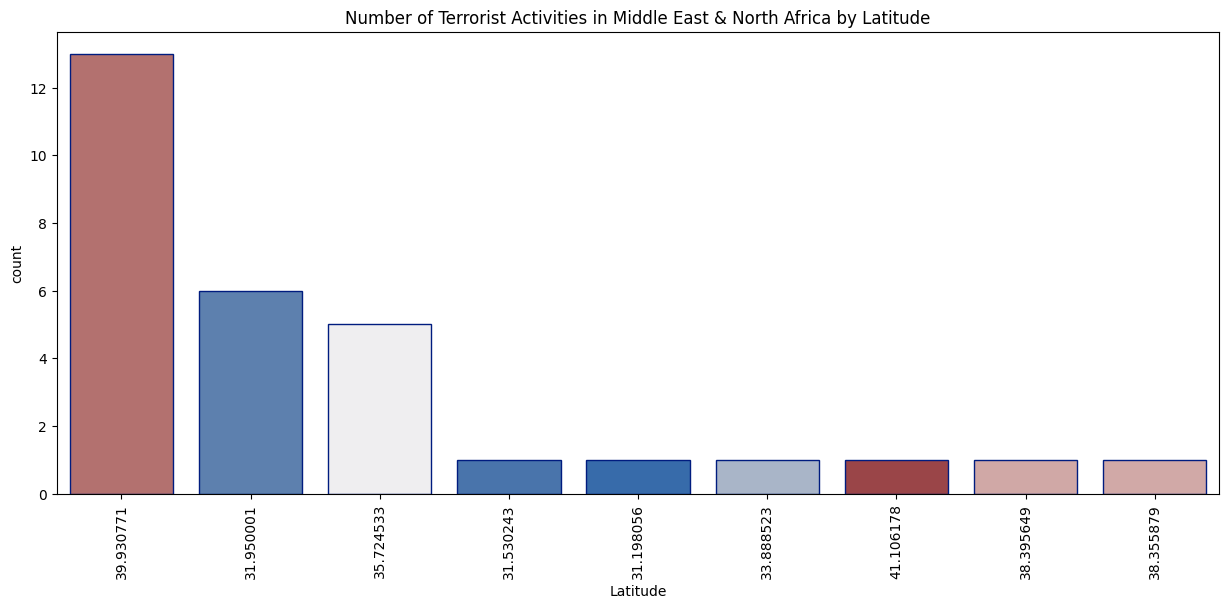

In [58]:
# Get the top 30 rows from the 'Mid_Nor' DataFrame
top_30_lat = Mid_Nor.head(30)

# Create a figure with a specific size
plt.figure(figsize=(15, 6))

# Create a count plot for the 'latitude' column
sns.countplot(x='Latitude', data=top_30_lat, palette='vlag',hue = 'Latitude', legend = False, order=top_30_lat['Latitude'].value_counts().index, edgecolor=sns.color_palette('dark', 7))

# Rotate the x-axis tick labels
plt.xticks(rotation=90)

# Set the title of the plot
plt.title('Number of Terrorist Activities in Middle East & North Africa by Latitude')

# Display the plot
plt.show()

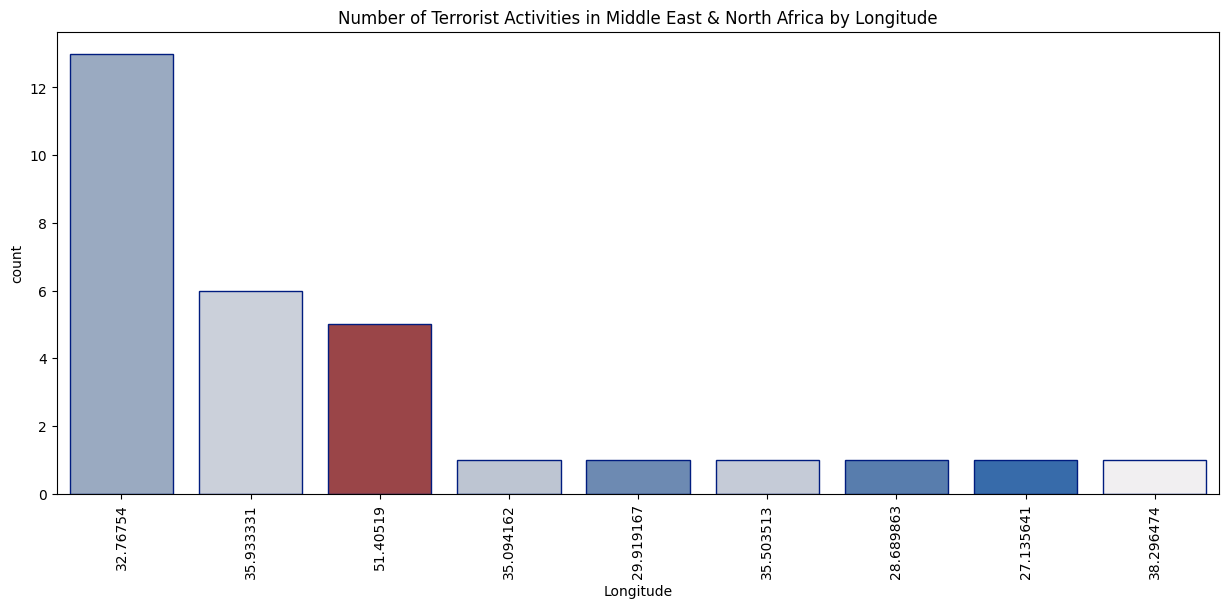

In [62]:

# Get the top 30 rows from the 'Mid_Nor' DataFrame
top_30_longitude = Mid_Nor.head(30)

# Create a figure with a specific size
plt.figure(figsize=(15, 6))

# Create a count plot for the 'latitude' column
sns.countplot(x='Longitude', data=top_30_lat, palette='vlag',hue = 'Longitude', legend = False, order=top_30_longitude['Longitude'].value_counts().index, edgecolor=sns.color_palette('dark', 7))

# Rotate the x-axis tick labels
plt.xticks(rotation=90)

# Set the title of the plot
plt.title('Number of Terrorist Activities in Middle East & North Africa by Longitude')

# Display the plot
plt.show()

## **NLP - Natural Language Processing**

In [65]:
!pip install nltk
!pip install wordcloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


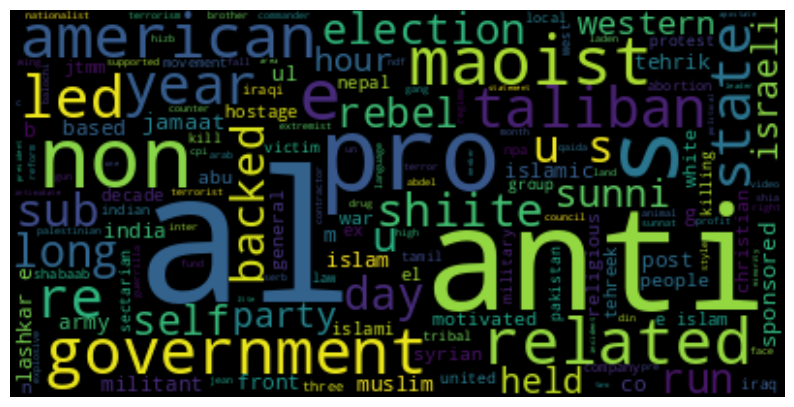

In [71]:
import nltk
nltk.download('punkt')
from wordcloud import WordCloud
nltk.download('stopwords')

# Convert the 'Motive' column to lowercase, replace '|' with space, and concatenate all values
motive = df['Motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')

# Tokenize the motive text into words
words = nltk.tokenize.word_tokenize(motive)

# Calculate the frequency distribution of words
word_dist = nltk.FreqDist(words)

# Load the English stopwords
stopwords = nltk.corpus.stopwords.words('english')

# Calculate the frequency distribution of words, excluding stopwords
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords)

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(" ".join(words_except_stop_dist))

# Display the word cloud
plt.figure(figsize=(10, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

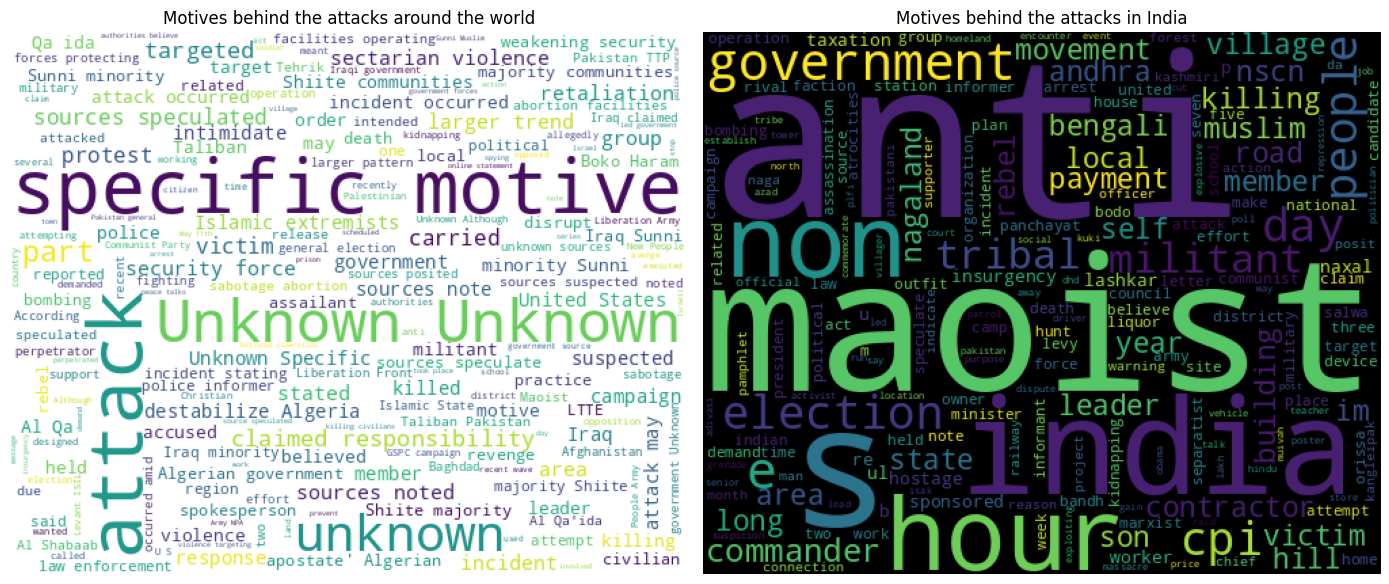

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# First wordcloud for all motives
motive = df.Motive.dropna()
wordcloud1 = WordCloud(background_color='white', width=500, height=400).generate(' '.join(motive))
axs[0].imshow(wordcloud1)
axs[0].axis('off')
axs[0].set_title('Motives behind the attacks around the world')



#Second wordcloud for Indian motives
df_country = df[df['Country'] == 'India']
country_motive = df_country['Motive'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(country_motive)
stopwords = set(STOPWORDS)
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords)
wordcloud2 = WordCloud(stopwords=stopwords, background_color='black', width=500, height=400).generate(" ".join(words_except_stop_dist))
axs[1].imshow(wordcloud2)
axs[1].axis('off')
axs[1].set_title('Motives behind the attacks in India')

plt.tight_layout()
plt.show()